<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_5_Cross_Validation%2C_Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

## moons

In [0]:
from sklearn.datasets import make_moons as make_datatype
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# random_state = np.random.RandomState(0)
random_state = 0

(500, 2)


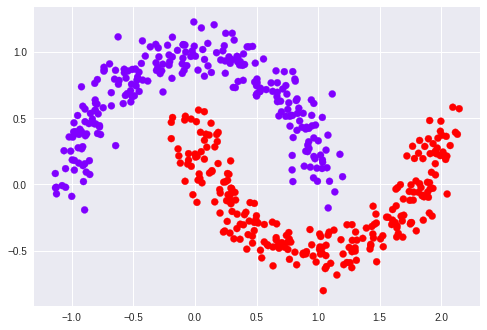

In [11]:
X, y = make_datatype(n_samples=500, noise=0.1,
                     random_state=random_state)
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [12]:
# {y_val for y_val in y}
# {y}    Doesn't work - unhashable type
set(y)

{0, 1}

# Apply Classifier

## fit and predict

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

In [15]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
y_test[: 5]

array([0, 0, 0, 0, 1])

In [17]:
# y_pred_proba[: 5].sum(axis=1)    # = 1
y_pred_proba[: 5, 1]

array([0.08758747, 0.03356248, 0.10559901, 0.03901789, 0.93058419])

In [0]:
y_pred_proba = y_pred_proba[:, 1]

## plot

In [0]:
import matplotlib.pyplot as plt

In [20]:
# make mesh
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 0].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx.shape, xx

((149, 195), array([[-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        ...,
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615],
        [-1.43473385, -1.41473385, -1.39473385, ...,  2.40526615,
          2.42526615,  2.44526615]]))

In [21]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
Z.shape, Z

((149, 195), array([[9.92791111e-01, 9.92955210e-01, 9.93115599e-01, ...,
         9.99915444e-01, 9.99917382e-01, 9.99919276e-01],
        [9.92144644e-01, 9.92323344e-01, 9.92498010e-01, ...,
         9.99907802e-01, 9.99909916e-01, 9.99911981e-01],
        [9.91440704e-01, 9.91635283e-01, 9.91825475e-01, ...,
         9.99899470e-01, 9.99901774e-01, 9.99904026e-01],
        ...,
        [4.48797103e-04, 4.59322270e-04, 4.70094157e-04, ...,
         3.71232234e-02, 3.79611708e-02, 3.88172699e-02],
        [4.11609850e-04, 4.21263272e-04, 4.31142996e-04, ...,
         3.41510253e-02, 3.49243175e-02, 3.57144721e-02],
        [3.77502764e-04, 3.86356586e-04, 3.95417981e-04, ...,
         3.14090281e-02, 3.21222973e-02, 3.28512148e-02]]))

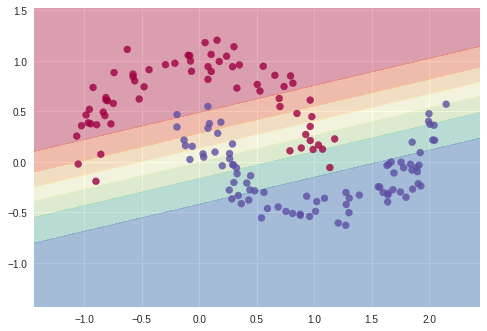

In [22]:
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral, alpha=0.8)

# Plot Precision-Recall curve

In [0]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_pred_proba)
precision.shape, recall.shape, precision, recall

((103,),
 (103,),
 array([0.82352941, 0.82178218, 0.82      , 0.82828283, 0.82653061,
        0.83505155, 0.83333333, 0.84210526, 0.84042553, 0.83870968,
        0.84782609, 0.85714286, 0.86666667, 0.86516854, 0.86363636,
        0.86206897, 0.87209302, 0.87058824, 0.86904762, 0.87951807,
        0.87804878, 0.87654321, 0.8875    , 0.88607595, 0.88461538,
        0.8961039 , 0.89473684, 0.89333333, 0.89189189, 0.90410959,
        0.90277778, 0.91549296, 0.91428571, 0.92753623, 0.94117647,
        0.94029851, 0.93939394, 0.95384615, 0.953125  , 0.96825397,
        0.96774194, 0.98360656, 0.98333333, 0.98305085, 0.98275862,
        0.98245614, 0.98214286, 0.98181818, 0.98148148, 0.98113208,
        0.98076923, 0.98039216, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        

Text(0, 0.5, 'Precision')

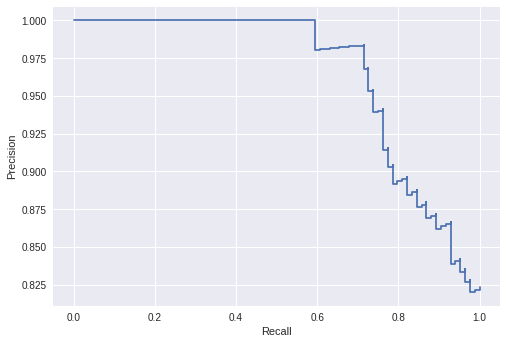

In [25]:
plt.step(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')

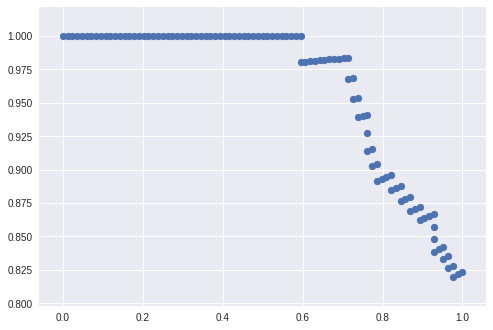

In [26]:
plt.scatter(recall, precision)

# Plot ROC curve

In [0]:
from sklearn.metrics import roc_curve, auc

In [28]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba)
fpr.shape, tpr.shape, thresholds.shape, fpr, tpr, thresholds

((34,),
 (34,),
 (34,),
 array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
        0.03030303, 0.03030303, 0.04545455, 0.04545455, 0.06060606,
        0.06060606, 0.09090909, 0.09090909, 0.10606061, 0.10606061,
        0.12121212, 0.12121212, 0.13636364, 0.13636364, 0.15151515,
        0.15151515, 0.16666667, 0.16666667, 0.18181818, 0.18181818,
        0.22727273, 0.22727273, 0.24242424, 0.24242424, 0.25757576,
        0.25757576, 0.27272727, 0.27272727, 1.        ]),
 array([0.        , 0.01190476, 0.5952381 , 0.5952381 , 0.71428571,
        0.71428571, 0.72619048, 0.72619048, 0.73809524, 0.73809524,
        0.76190476, 0.76190476, 0.77380952, 0.77380952, 0.78571429,
        0.78571429, 0.82142857, 0.82142857, 0.8452381 , 0.8452381 ,
        0.86904762, 0.86904762, 0.89285714, 0.89285714, 0.92857143,
        0.92857143, 0.95238095, 0.95238095, 0.96428571, 0.96428571,
        0.97619048, 0.97619048, 1.        , 1.        ]),
 array([1.98979857, 0.98979857, 0.88975687, 

In [29]:
area_under_curve = auc(fpr, tpr)
area_under_curve

0.954004329004329

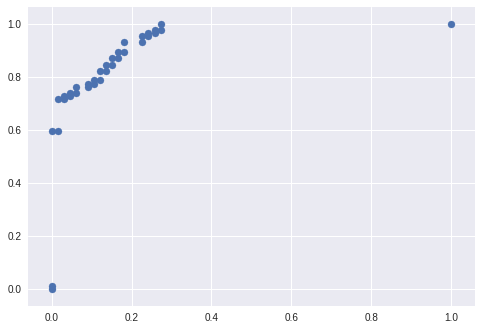

In [30]:
plt.scatter(fpr, tpr)

Text(0, 0.5, 'TPR')

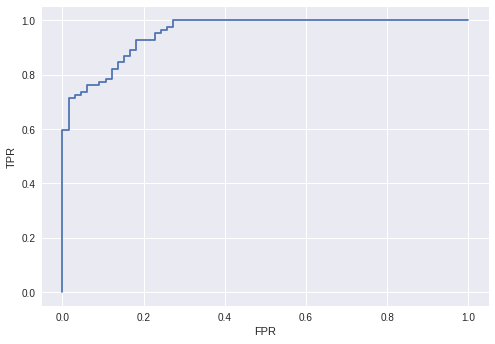

In [31]:
# plt.plot(fpr, tpr)
plt.step(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')

# PCA

In [0]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [34]:
X, y = make_classification(n_classes=2)
X.shape, y.shape, X, y

((100, 20),
 (100,),
 array([[-1.49267227, -1.24315057,  0.68684238, ..., -0.01727391,
         -1.29958337, -0.40433723],
        [ 0.44417237, -1.07754471, -1.07571226, ...,  0.54293641,
         -1.31009295, -1.07034148],
        [ 0.25224582, -1.92507845,  1.5764208 , ..., -0.43786812,
          1.98776478, -0.34466723],
        ...,
        [-0.31613123, -1.71866649,  1.76175832, ...,  1.44372202,
          0.38113521, -0.1596736 ],
        [ 1.67504834,  1.46613069, -0.18478698, ...,  0.027738  ,
         -0.48752829,  1.12151928],
        [-1.84117985, -0.36128361, -1.19536635, ..., -1.70743831,
          0.56217051,  1.51813223]]),
 array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]))

In [41]:
pca = PCA(n_components=2)

X_new = pca.fit_transform(X)
X_new.shape, X_new

((100, 2), array([[ 6.71837154e-01,  3.11834872e-01],
        [ 1.78888762e-01,  9.87226351e-01],
        [ 1.75466170e+00,  8.59821040e-01],
        [-7.90423993e-02,  1.04066589e+00],
        [-1.13769208e+00, -5.15921186e-01],
        [ 7.52035353e-01,  1.74168060e+00],
        [-4.69343814e+00, -1.53258407e+00],
        [ 1.06137697e+00, -1.18956314e+00],
        [-2.22297228e+00, -2.53897218e-01],
        [ 4.87013568e+00,  2.77415173e-01],
        [-3.10759730e+00, -6.29063753e-03],
        [-4.92684993e+00,  7.42880534e-02],
        [-1.81026232e+00,  1.81431991e+00],
        [-1.33294321e+00,  1.63792041e+00],
        [ 5.06910520e+00,  2.15900114e+00],
        [-3.12451369e-01, -1.02223284e+00],
        [-1.25147404e+00,  9.58684452e-02],
        [-9.69585773e-01, -1.34507282e+00],
        [ 4.42729823e+00, -3.25701921e+00],
        [ 2.61777041e+00, -7.67258325e-01],
        [ 1.70221518e+00, -1.93920557e+00],
        [-4.33548246e+00, -2.92700590e-01],
        [ 4.19154694e+

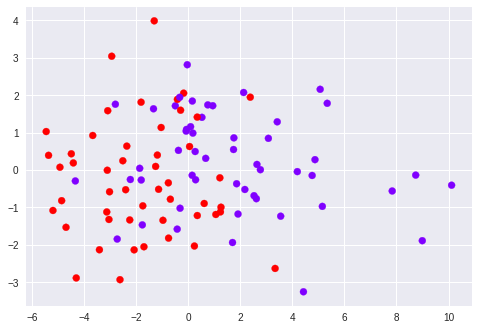

In [42]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.rainbow)